<a href="https://colab.research.google.com/github/aishuse/Machine-Learning-Projects/blob/main/Simple_Linear_Regression_Implementation_height_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Datasets/height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [ ]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'HEight')

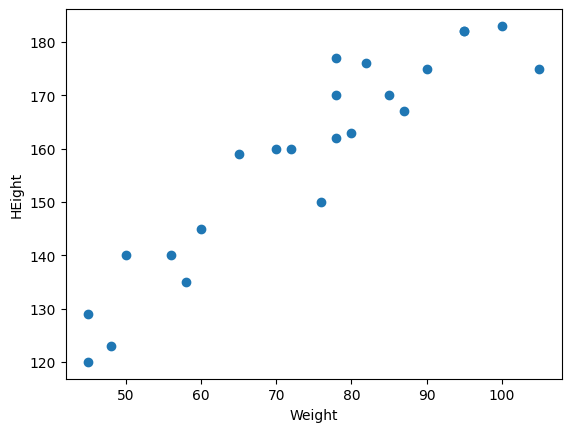

In [ ]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel("Weight")
plt.ylabel("HEight")

* As height increases weight increases

In [ ]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


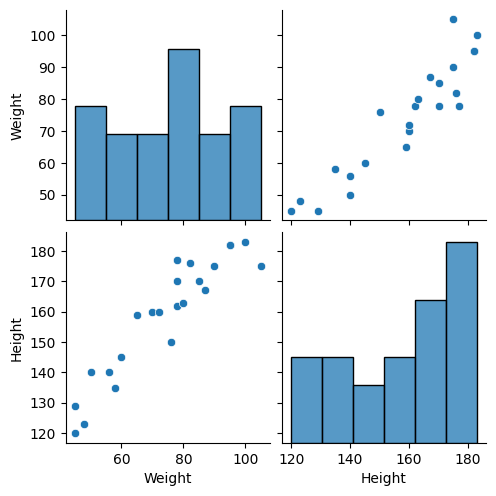

In [ ]:
sns.pairplot(df)

In [ ]:
# split dependent and independent feature

X = df.iloc[:,:-1]
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
y = df.iloc[:,-1]
y

,Height
0,120
1,135
2,123
3,145
4,160
5,162
6,163
7,175
8,182
9,170


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
np.array(X).shape

(23, 1)

In [ ]:
np.array(y).shape

(23,)

In [ ]:
# train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# apply single linear regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
# slope/coefficient                 y = mx+c    x-> weight, m-> slope , c->intercept

print("coefficient or slope: ",regression.coef_)
print("intercept: ",regression.intercept_)

coefficient or slope:  [17.03207732]
intercept:  157.8125


In [ ]:
# prediction for test data

y_pred = regression.predict(X_test)

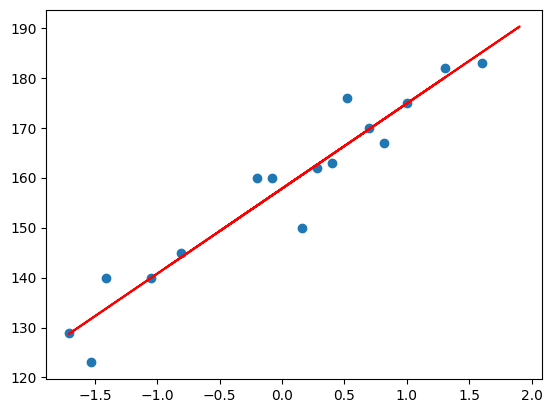

In [ ]:
# plot training data, best fit line

plt.scatter(X_train,y_train)
plt.plot(X_test, y_pred, color='r')

In [ ]:
# performance metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

print("MSE: ",mse)
print("MAE: ", mae)
print("RMSE: ",rmse)

MSE:  103.09818711844574
MAE:  9.237776679921925
RMSE:  10.153727744944009


In [ ]:
from sklearn.metrics import r2_score

r2_score = r2_score(y_test,y_pred)
print("R2_score: ",r2_score)

R2_score:  0.7828485570493535


In [ ]:
# OLS linear regression

import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[  4.74495791   4.74495791 -29.11095796  22.18588426  -8.59222107
  32.44525271 -15.77377898]


In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.054
Method:                 Least Squares   F-statistic:                             0.1745
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                       0.682
Time:                        16:57:01   Log-Likelihood:                         -103.69
No. Observations:                  16   AIC:                                      209.4
Df Residuals:                      15   BIC:                                      210.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
## prediction for new data

regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.40183684])